In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
import seaborn as sns
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.index = df.index + 1

In [4]:
df.head()

,sbd,tên,dd,mm,yyyy,toán,ngữ văn,khxh,khtn,lịch sử,địa lí,gdcd,sinh học,vật lí,hóa học,tiếng anh
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2


In [5]:
df = df.rename(columns={"sbd":"id", "tên":"full name", "toán":"math", "ngữ văn":"literature", "khxh":"social science", 
                        "khtn":"natural science", "lịch sử":"history", "địa lí":"geography", "gdcd":"civics", 
                        "sinh học":"biology", "vật lí":"physics", "hóa học":"chemistry", "tiếng anh":"english"})

In [6]:
df.head()

,id,full name,dd,mm,yyyy,math,literature,social science,natural science,history,geography,civics,biology,physics,chemistry,english
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2


In [7]:
len(df[df["math"] != -1])

74179

In [8]:
df.columns

Index(['id', 'full name', 'dd', 'mm', 'yyyy', 'math', 'literature',
       'social science', 'natural science', 'history', 'geography', 'civics',
       'biology', 'physics', 'chemistry', 'english'],
      dtype='object')

In [9]:
count = np.array([len(df[df[x] != -1.0]) for x in df.columns[5:]])

In [10]:
count

array([74179, 72642, 25221, 41948, 30313, 29597, 25091, 42595, 42853,
       43088, 65735])

In [11]:
df.columns[5:]

Index(['math', 'literature', 'social science', 'natural science', 'history',
       'geography', 'civics', 'biology', 'physics', 'chemistry', 'english'],
      dtype='object')

In [12]:
presence = pd.DataFrame(count,index=df.columns[5:])

In [13]:
presence

,0
math,74179
literature,72642
social science,25221
natural science,41948
history,30313
geography,29597
civics,25091
biology,42595
physics,42853
chemistry,43088


In [14]:
presence.iplot(kind='bar',
              title='The numbers of student sitting for an exam',
              xTitle='Subject', yTitle='Number of students')

<AxesSubplot:>

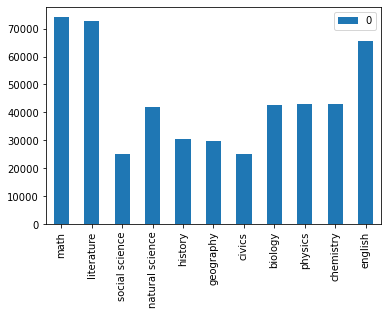

In [15]:
presence.plot.bar()

In [16]:
absence = pd.DataFrame(len(df) - count,index=df.columns[5:])

In [17]:
absence

,0
math,265
literature,1802
social science,49223
natural science,32496
history,44131
geography,44847
civics,49353
biology,31849
physics,31591
chemistry,31356


In [18]:
absence.iplot(kind='bar',
              title='The numbers of student did not take or did not sign up for an exam',
              xTitle='Subject', yTitle='Number of students')

In [19]:
absence_percentage = pd.DataFrame(count/len(df)*100,index=df.columns[5:])

In [20]:
absence_percentage.iplot(kind='bar',
              title='The percentage of student who did not take or did not sign up for an exam',
              xTitle='Subject', yTitle='Percentage of students')

In [21]:
df.iloc[0]

id                             2000001
full name          Phạm Hoàng Hương Ái
dd                                   4
mm                                  11
yyyy                              2002
math                               6.6
literature                        6.25
social science                    6.67
natural science                   -1.0
history                           5.75
geography                          7.0
civics                            7.25
biology                           -1.0
physics                           -1.0
chemistry                         -1.0
english                            5.2
Name: 1, dtype: object

In [22]:
combination = np.array([0 for x in range(12)])

In [23]:
combination

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
for j in range(len(df)):
    count = 0
    for i in df.iloc[j]:
        if i == -1:
            count += 1
    combination[11 - count] += 1

In [25]:
combination

array([    0,    80,   122,  2598,  4334,   318,  2730, 64261,     0,
           0,     0,     1])

In [26]:
sum(combination)

74444

In [27]:
subject_combination = pd.DataFrame(combination,columns=['Number of students'])

In [28]:
subject_combination

,Number of students
0,0
1,80
2,122
3,2598
4,4334
5,318
6,2730
7,64261
8,0
9,0


In [29]:
labels = ['0 subject', '1 subject'] + [str(x) + ' subjects' for x in range(2,12)]

In [30]:
labels

['0 subject',
 '1 subject',
 '2 subjects',
 '3 subjects',
 '4 subjects',
 '5 subjects',
 '6 subjects',
 '7 subjects',
 '8 subjects',
 '9 subjects',
 '10 subjects',
 '11 subjects']

In [31]:
import plotly.express as px

# Random Data
 
fig = px.pie(values = combination, names = labels, 
             color_discrete_sequence = px.colors.qualitative.Pastel1,title = 'Number of exams taken by each student')
fig.show()

In [32]:
df.head()

,id,full name,dd,mm,yyyy,math,literature,social science,natural science,history,geography,civics,biology,physics,chemistry,english
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2


In [111]:
mean = []
for j in range(len(df)):
    count = 0
    sum = 0
    for i in df.iloc[j][5:]:
        if i != -1:
            count += 1
            sum += i
     
    mean.append(round(sum/count,2))

In [112]:
count 

4

In [113]:
sum

25.85

In [118]:
mean = np.array(mean)

In [119]:
df['mean'] = mean

In [120]:
df.head()

,id,full name,dd,mm,yyyy,math,literature,social science,natural science,history,geography,civics,biology,physics,chemistry,english,mean
1,2000001,Phạm Hoàng Hương Ái,4,11,2002,6.6,6.25,6.67,-1.00,5.75,7.00,7.25,-1.0,-1.00,-1.00,5.2,6.39
2,2000002,Đặng Huỳnh Vĩnh An,13,12,2002,8.2,7.75,7.58,-1.00,7.00,7.25,8.50,-1.0,-1.00,-1.00,7.0,7.61
3,2000003,Lâm Nguyễn Mộng Thùy An,6,4,2001,6.8,6.75,6.92,-1.00,4.75,7.75,8.25,-1.0,-1.00,-1.00,6.0,6.75
4,2000004,Lê Tiêu Hoàng An,18,11,2002,7.8,6.25,-1.00,6.25,-1.00,-1.00,-1.00,7.0,5.50,6.25,5.6,6.38
5,2000005,Lư Thuận An,14,1,2002,6.4,6.50,-1.00,6.17,-1.00,-1.00,-1.00,5.5,6.75,6.25,8.2,6.54


In [131]:
df['mean'].iplot(kind='hist',bins=100)